<h1 style="color:blue">Real Estate Price Prediction</h1>

In [1]:
# Importing modules which are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating Data Frame for our data
df1 = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<h2 style="color: red"> Data Cleaning</h2>

In [6]:
# total number of each area in area_type feature
df1.groupby("area_type")['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# Now droping some features which are not neccessary
df2 = df1.drop(["area_type", "society", "availability", "balcony"], axis="columns")

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
# handling null data
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
# As we have so many rows than we can just delete the null rows
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
# Now in size feature we have diffenrent units like BHK or Bedroom so, let's handle them and create ne feature
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3["bhk"] = df3["size"].apply(lambda x: float(x.split(" ")[0]))

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_9800\2603676042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: float(x.split(" ")[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [16]:
# Now let's see the total_sqft feature
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# let see how many varaition values we have in this feature
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9.0
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2.0
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4.0


In [18]:
# in above we can see that we have values in range and other so, let's fix it
def convert_sqft_to_num(x):
    tokken = x.split("-")
    if len(tokken) == 2:
        return (float(tokken[0])+float(tokken[1]))//2
    try:
        return float(x)
    except:
        return None

In [19]:
# lets test
convert_sqft_to_num('2210')

2210.0

In [20]:
convert_sqft_to_num("2210-4423")

3316.0

In [21]:
convert_sqft_to_num("2210sqft meter")

In [22]:
# so let's apply this function
df4 = df3.copy() # deep copy
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)

In [23]:
df4["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [24]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


<h2 style="color: red">Feature Engineering </h2>

In [25]:
# let create another column price per square fit
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


In [26]:
df5 = df4.copy()

In [27]:
df5["price_per_sqft"] = np.round(df5["price"]*100000/df5["total_sqft"], 2)
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.24
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0,36274.51


In [28]:
# Now let see our number of location
len(df5.location.unique())

1304

In [29]:
# As in further future we have to do some One-Hot Encoding 
# So let take some locations and then convert rest location into other category
df_location = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
df_location

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [30]:
# Now let if we have count of location less then 10 then convert it to other
df_location_less_then_10 = df_location[df_location <= 10]
df_location_less_then_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [31]:
df5["location"] = df5["location"].apply(lambda x: "other" if x in df_location_less_then_10 else x)

In [32]:
len(df5.location.unique())

242

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.51


<h2 style="color: red">Outlier Removal</h2>

In [34]:
# Outlier Removal means removing those data which are some type of data errors
# for example: if we have 100sqft area whith 4 bhk then it can not be true

In [35]:
# from the above example let explore our bhk and total_sqft feature
df5.sort_values(by="total_sqft", ascending=True)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4086,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4.0,12000000.00
4972,other,7 BHK,5.0,7.0,115.0,7.0,2300000.00
349,other,3 Bedroom,11.0,3.0,74.0,3.0,672727.27
1020,other,1 BHK,15.0,1.0,30.0,1.0,200000.00
1122,other,5 Bedroom,24.0,2.0,150.0,5.0,625000.00
...,...,...,...,...,...,...,...
11615,other,3 Bedroom,NaN,2.0,80.0,3.0,NaN
12186,7th Phase JP Nagar,2 BHK,NaN,2.0,51.0,2.0,NaN
12252,other,5 BHK,NaN,5.0,75.0,5.0,NaN
12560,Hosa Road,3 BHK,NaN,3.0,110.0,3.0,NaN


In [36]:
# In above we can see that we have an 1sqft area with 4 bhk which looks very funny :>
# So as we should know that when we divide our area with bhk then it will give amound around 500 sqft
# So we can remove those data points which are <= 300 sqft

In [37]:
df6 = df5.copy()

In [38]:
df6[df6["total_sqft"]/df6["bhk"]<300].head() # outliears

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.98
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.00


In [39]:
df6 = df6[~(df6["total_sqft"]/df6["bhk"]<300)]

In [40]:
df6.shape

(12502, 7)

In [41]:
# Now let see our price_per_sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.513720
std        4168.123571
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [42]:
# In above we can see that we have price like $247 and $176470 which are some more outliers
# So let remove it by std and mean relation

In [43]:
def remove_outliers_price(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-s))&(subdf.price_per_sqft<=(m+s))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    return df_out

In [44]:
df6 = remove_outliers_price(df6)

In [45]:
df6["price_per_sqft"].describe() # Now it looks great

count    10244.000000
mean      5657.812833
std       2266.270432
min       1250.000000
25%       4244.175000
50%       5172.845000
75%       6426.420000
max      24509.800000
Name: price_per_sqft, dtype: float64

In [46]:
df6.shape

(10244, 7)

In [47]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3.0,3520.00
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.00
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.67
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.80
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.40


In [48]:
# Now let plot a scatter plot to see the relation prices of bhk's
# As may it possible that there were some data where we have low price of 3hk then 2bhk

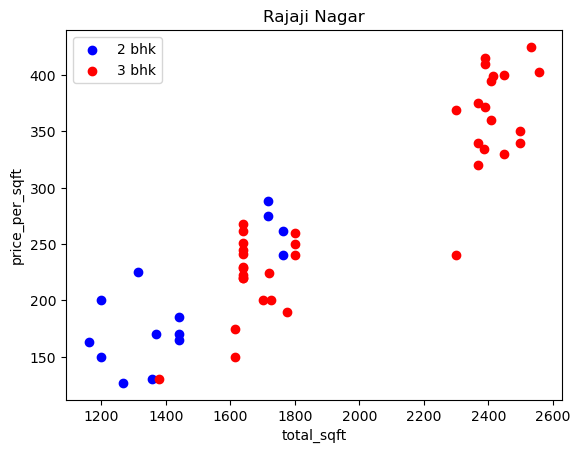

In [49]:
def scatter_plot(df, location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 bhk")
    plt.scatter(bhk3.total_sqft, bhk3.price, color="red", label="3 bhk")
    plt.xlabel("total_sqft")
    plt.ylabel("price_per_sqft")
    plt.title(location)
    plt.legend()
    
scatter_plot(df6, "Rajaji Nagar")
# Here we can see that our 2 bhk flat has higher price than 3bhk at area around 1600-1800

<h4>We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.</h4>
<pre>
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
</pre>
<h4>Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</h4>


In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.00
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.67
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.80
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.40
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.65
...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2.0,5833.33
10236,other,1 BHK,1800.0,1.0,200.0,1.0,11111.11
10239,other,2 BHK,1353.0,2.0,110.0,2.0,8130.08
10240,other,1 Bedroom,812.0,1.0,26.0,1.0,3201.97


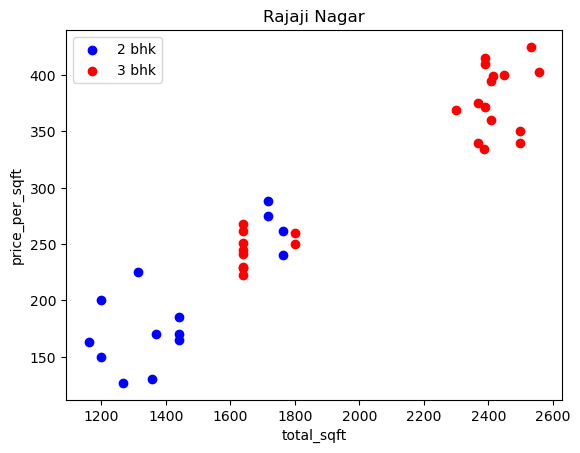

In [51]:
# Now let's plot our scatter again
scatter_plot(df7, "Rajaji Nagar")

In [52]:
# Now let see our bath feature
df7["bath"].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([4.779e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

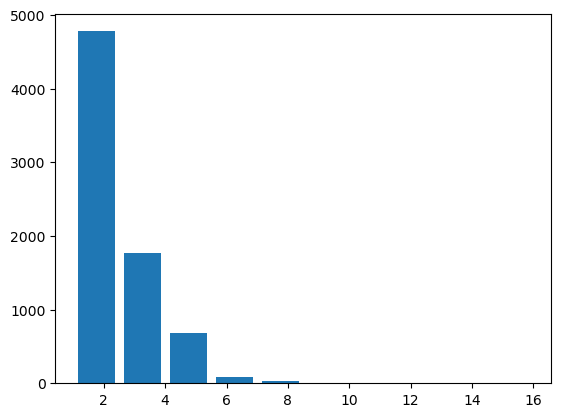

In [53]:
# In bove we can see that we have number of bathrooms like 16 which looks weired
# Now let plot a histograph to see that bath
plt.hist(df7.bath, rwidth=0.8)

In [54]:
# So now we will remove those rows which have bath greather than bhk+2 
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.03
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.57
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.03
8405,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.90


In [55]:
df8 = df7[~(df7.bath>df7.bhk+2)]

In [56]:
df8.shape

(7338, 7)

In [57]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.00
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.67
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.80
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.40
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.65


In [58]:
# Now let drop some feature which are unneccesary
df9 = df8.copy()

In [59]:
df10 = df9.drop(["price_per_sqft", "size"], axis="columns")
df10

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0
...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2.0
10236,other,1800.0,1.0,200.0,1.0
10239,other,1353.0,2.0,110.0,2.0
10240,other,812.0,1.0,26.0,1.0


In [60]:
df10.to_csv("Final Data Set.csv", index=False)